# Intro to Pandas
Pandas is a package used to work with tabular data.

In [1]:
import pandas as pd
print(pd.__version__)

0.25.1


## Series
A Series is an indexed collection of objects. By default a Series index is based on integer numbers starting from 0 but we can use a different index, such as a set of chars or dates.

In [2]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'], index=['a', 'b', 'c'])
populations = pd.Series([852469, 1015785, 485199], index=['a', 'b', 'c'])

## DataFrame
DataFrame is the class that provides a powerful set of functions to use when working with tabular data. It is a data structure defined as a collection of columns with a common index. By default a DataFrame index is based on integer numbers, like for the Series object, starting from 0 but we can use a different index as well. If we use Series as columns the DataFrame index will be the same as that used in the Series objects. As an example we build a DataDrame from two Series objects

In [3]:
cities = pd.DataFrame({ 'city name': city_names, 'population': populations })

We can add two more columns, one with data and a second one with a definition of the data computed from two columns that already exist in the DataFrame:

In [4]:
cities['area'] = pd.Series([46.87, 176.53, 97.92], index=['a', 'b', 'c'])
cities['density'] = cities['population'] / cities['area']
cities

,city name,population,area,density
a,San Francisco,852469,46.87,18187.945381
b,San Jose,1015785,176.53,5754.177760
c,Sacramento,485199,97.92,4955.055147


We can perfom statistical computation using the same kind of functions that are also available for a NumPy array such as the mean value of one or more columns.

In [5]:
mean_area, mean_population = cities[['area', 'population']].mean()
print("Cities mean area: {0:.2f}\nCities mean population: {1:.0f}".format(mean_area, mean_population))

Cities mean area: 107.11
Cities mean population: 784484


We can select a column by its name

In [6]:
cities['city name']

a    San Francisco
b         San Jose
c       Sacramento
Name: city name, dtype: object

and a row by its index

In [7]:
cities.loc['b']

city name     San Jose
population     1015785
area            176.53
density        5754.18
Name: b, dtype: object

or just one element by its column name and row index 

In [8]:
cities['city name']['b']

'San Jose'

or its row index and column name

In [9]:
cities.loc['b']['city name']

'San Jose'

or finally by the row index position, and the column index position 

In [10]:
cities.iloc[1][0]

'San Jose'

## Lambdas
We can apply anonimous functions to columns. For example we want to add a new column to our cities DataFrame that tells whether a city name starts with "San " and has an area larger than 50 $km^2$ 

In [11]:
names = cities['city name']
area = cities['area']
cities['Saint_50'] = names.apply(lambda name: name[:4] == "San ") & area.apply(lambda area: area > 50)
cities

,city name,population,area,density,Saint_50
a,San Francisco,852469,46.87,18187.945381,False
b,San Jose,1015785,176.53,5754.177760,True
c,Sacramento,485199,97.92,4955.055147,False


## List comprehension

In [6]:
def saint_50(city_name, area):
  is_saint = city_name[0:3] == "San"
  is_50 = area > 50
  return is_saint & is_50

# A solution using list comprehension and the zip() function  
cities["Saint_50_List_Compr1"] = [saint_50(city_name, area) for city_name, area in zip(cities['city name'], cities['area'])]
cities

,city name,population,area,density,Saint_50_Lambdas,Saint_50_List_Compr1
a,San Francisco,852469,46.87,18187.945381,False,False
b,San Jose,1015785,176.53,5754.177760,True,True
c,Sacramento,485199,97.92,4955.055147,False,False


In [7]:
# A 3rd solution using two list comprehension
saint = [name[0:3] == "San" for name in cities["city name"]]
area50 = [area > 50 for area in cities['area']]
cities["Saint_50_List_Compr2"] = pd.Series(saint) & pd.Series(area50)
cities

,city name,population,area,density,Saint_50_Lambdas,Saint_50_List_Compr1,Saint_50_List_Compr2
a,San Francisco,852469,46.87,18187.945381,False,False,NaN
b,San Jose,1015785,176.53,5754.177760,True,True,NaN
c,Sacramento,485199,97.92,4955.055147,False,False,NaN


## DatetimeIndex
Time Series are common in science and finance, with Pandas we can build Time Series by associating an observation to the date and time it was acquired. The temporal information is often provided with the data, as an example we use a data set of the [stock prices of ENI S.p.A.](https://finance.yahoo.com/quote/ENI.MI/), a company in the energy sector, downloaded from Yahoo! Finance. The data set contains a one year long list of stock price with the prices at the beginning and end of each market day, the highest and lowest prices and the number of stocks exchanged (volume). We would like to use the 'Date' field as the index of the data set but by default the index is based on integers and represent the row index.

In [96]:
eni_tmp = pd.read_csv('finance/data/ENI.MI.csv')
eni_tmp[:3]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-23,10.132,10.234,10.092,10.234,9.527454,15205357
1,2021-08-24,10.288,10.358,10.248,10.318,9.605656,13473152
2,2021-08-25,10.304,10.340,10.274,10.330,9.616826,8469631


One way to proceed is to create a Series object from the 'Date' column of the data set, transform the values from string to Timestamp and use that Series as the index of a new DataFrame created from the original one. We can also remove the 'Date' column.

In [104]:
date_index = pd.to_datetime(eni_tmp['Date'])
eni_tmp.drop(['Date'], axis=1, inplace=True)

Now we can select the records by dates

In [105]:
eni = eni_tmp.set_index(date_index)
eni['2021-08-23':'2021-08-25']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-23,10.132,10.234,10.092,10.234,9.527454,15205357
2021-08-24,10.288,10.358,10.248,10.318,9.605656,13473152
2021-08-25,10.304,10.340,10.274,10.330,9.616826,8469631


## Time Series Visualization
We can now plot the Time Series data

In [262]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
print("matplotlib version: %s"%mpl.__version__)

matplotlib version: 3.3.1


On the x axis we want to show the label of the market days but only one per week to not clutter too much the graph, so we create a new DatetimeIndex with the same start and end date as in the original data set but setting the frequency to 'W', that is weekly. We will use this DatetimeIndex only in the plot.

In [131]:
start_day = date_index[0]
end_day = date_index[len(date_index) - 1]
week_index = pd.date_range(start_day, end_day, freq='W')

Finally we set title and labels and the graph is ready

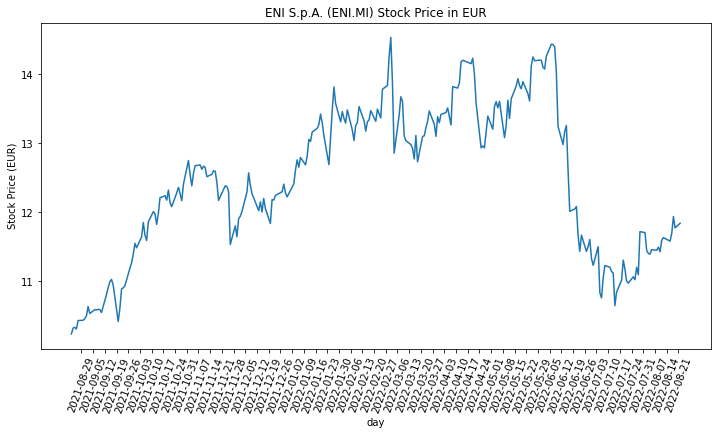

In [133]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_title("ENI S.p.A. (ENI.MI) Stock Price in EUR")
ax.set_xlabel("day")
ax.set_ylabel("Stock Price (EUR)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(eni['Close'])

## Select by columns

In [172]:
imf_commodities_tmp = pd.read_csv('finance/data/IMF_Commodities_Price.csv')
imf_commodities_tmp[:3]

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,2019,2019M1,2019M2,...,2021M11,2021M12,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,Unnamed: 53
0,World,1,Agriculture,PAGRI,Index,IX,Value,98.509428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1,Agriculture,PAGRI,Index,IX,Value,NaN,99.757387,98.388718,...,127.470196,130.407202,136.114592,142.49899,150.384482,154.113522,151.708154,146.722491,136.550494,NaN
2,World,1,Agriculture,PAGRI,Percent Change over Previous Period,PC_PP_PT,Value,-3.531503,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
nat_gas_eu_tmp = imf_commodities_tmp[(imf_commodities_tmp['Commodity Code'] == 'PNGASEU') & (imf_commodities_tmp['Unit Code'] == 'USD')]
nat_gas_eu_tmp

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,2019,2019M1,2019M2,...,2021M11,2021M12,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,Unnamed: 53
734,World,1,"Natural gas, EU",PNGASEU,US Dollars,USD,Value,4.454858,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,World,1,"Natural gas, EU",PNGASEU,US Dollars,USD,Value,NaN,7.161065,5.986339,...,27.383826,37.363363,27.890945,26.984281,41.727688,31.989874,27.464166,32.912607,51.145913,NaN


In [252]:
nat_gas_eu_months_tmp = nat_gas_eu_tmp.loc[735][8:].dropna()
nat_gas_eu_months_tmp.values[:3]

array([7.16106495279494, 5.986338560044779, 5.197180073252349],
      dtype=object)

In [253]:
nat_gas_us_tmp = imf_commodities_tmp[(imf_commodities_tmp['Commodity Code'] == 'PNGASUS') & (imf_commodities_tmp['Unit Code'] == 'USD')]
nat_gas_us_tmp

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,2019,2019M1,2019M2,...,2021M11,2021M12,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,Unnamed: 53
182,World,1,"Natural Gas, US Henry Hub Gas",PNGASUS,US Dollars,USD,Value,2.528527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,World,1,"Natural Gas, US Henry Hub Gas",PNGASUS,US Dollars,USD,Value,NaN,3.108696,2.6795,...,5.119091,3.858261,4.233333,4.475,4.971304,6.744762,8.16,7.570909,7.109048,NaN


In [255]:
nat_gas_us_months_tmp = nat_gas_us_tmp.loc[183][8:].dropna()
nat_gas_us_months_tmp.values[:3]

array([3.10869565217391, 2.6795, 2.80333333333333], dtype=object)

In [256]:
start_day = pd.to_datetime('2019-01-01')
end_day = pd.to_datetime('2022-07-01')
month_index = pd.date_range(start_day, end_day, freq='MS')

In [257]:
nat_gas_eu_months = pd.DataFrame(nat_gas_eu_months_tmp.values, index=month_index, columns=['Price'])
nat_gas_eu_months[:2]

,Price
2019-01-01,7.16106
2019-02-01,5.98634


In [258]:
nat_gas_us_months = pd.DataFrame(nat_gas_us_months_tmp.values, index=month_index, columns=['Price'])
nat_gas_us_months[:2]

,Price
2019-01-01,3.1087
2019-02-01,2.6795


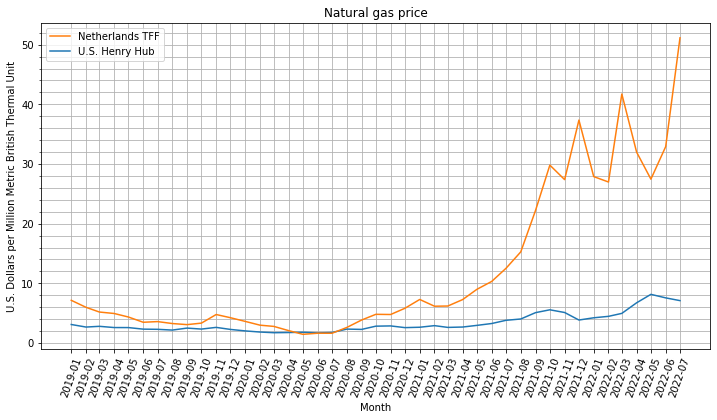

In [279]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_title("Natural gas price")
ax.set_xlabel("Month")
ax.set_ylabel("U.S. Dollars per Million Metric British Thermal Unit");
ax.set_xticks(month_index)
ax.set_xticklabels(month_index, rotation=70)
ax.set_yticks(np.arange(0, 60, 2), minor=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True, which='both')
us_plt, = plt.plot(nat_gas_us_months)
netherlands_plt, = plt.plot(nat_gas_eu_months)
plt.legend((netherlands_plt, us_plt), ['Netherlands TFF', 'U.S. Henry Hub'], loc='upper left')
plt.savefig('natural_gas_price.png')